In [13]:
import os
import networkx as nx
import matplotlib.pyplot as plt

filename = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Benign/90c5a44fb76d7c7f3a24836446e96bf2b72c65d7e7a030942511b643cf1fb259./subgraph_20percent.gpickle"
graph = nx.read_gpickle(filename)

nodes : 10
egdes : 12


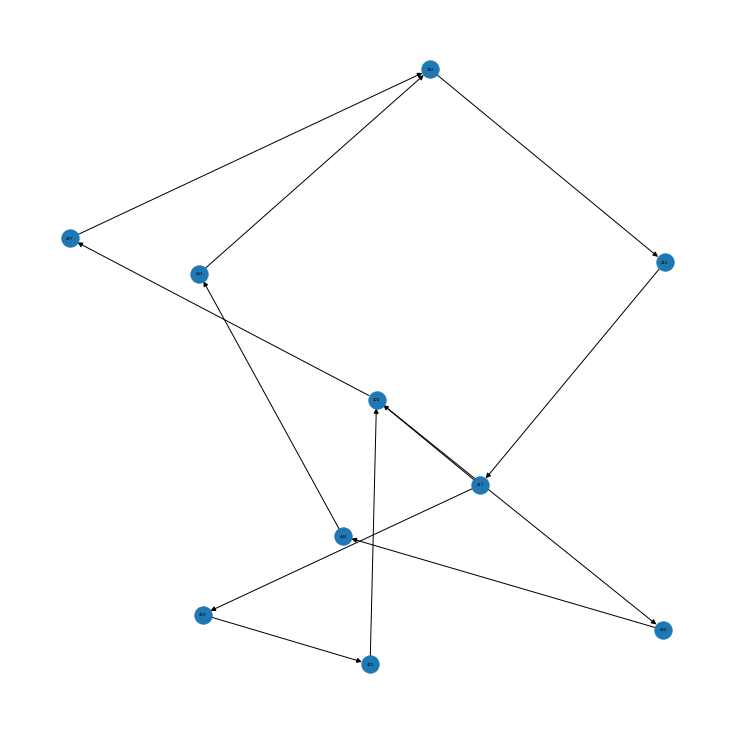

In [17]:
fig = plt.figure(figsize=(10, 10))
# for directed graph

largest_strongly_connected = max(nx.strongly_connected_components(graph), key=len)
subgraph = graph.subgraph(largest_strongly_connected)

pos = nx.spring_layout(subgraph)

nx.draw(subgraph,pos, with_labels=True, font_size=4)

print('nodes :', len(list(subgraph.nodes())))
print('egdes :', len(list(subgraph.edges())))

plt.show()

In [9]:
import os
import networkx as nx
import glob

# 目標目錄的路徑
directory_path = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_train/Benign"

with open(directory_path + "/0_list.txt", "r") as f:
    file_list = f.readlines()
f.close()

No_Node = dict()

# 遍歷檔案列表，載入 pickle 檔案
for filename in file_list:
    file_path = os.path.join(directory_path, filename[:-1])

    # 讀入pickle檔
    G = nx.read_gpickle(file_path)
    # largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
    # subgraph = graph.subgraph(largest_weakly_connected)
    
    # print("filename : ", filename[:-1])
    # print("# of subgraph : ", len(subgraph.nodes(data=False)))

    G_cnt = 0
    for node in G.nodes(data=False):
        if "temp" in str(node):
            # print("# of G : ", G_cnt)
            No_Node[filename[:-1]] = G_cnt
            break
        G_cnt += 1

In [107]:
import re
import networkx as nx

# 定义正则表达式，用于匹配数字常量和字符串常量
numeric_pattern =  r'(?<!r)(?<!\d)(0x[\da-fA-F]+|\d+)(?!])'
string_pattern = r'\'[^\']*\'|\"[^\"]*\"'

# 读取gpickle文件
G = nx.read_gpickle('/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_train/Benign/c949ab48c4caa3729995af7ddf5d4af442e84eb970613fc802a56d4a05b50cf1.gpickle')

# 统计数字常量和字符串常量的数量
for node, data in G.nodes(data=True):
    if 'Ins' in data:
        ins_list = data['Ins']
        num_constants = 0
        string_constants = 0
        for ins in ins_list:
            op_type = ins[1][0]  # 获取指令类型
            if op_type.startswith('j') or op_type.startswith('call'):  # 如果是跳转指令，直接跳过操作数
                continue
            operands = ins[1][1:]  # 获取操作数列表
            for operand in operands:
                # 使用正则表达式判断操作数的类型，并且忽略包含"word"或"ptr"的操作数
                if not ('word' in operand or 'ptr' in operand):
                    if re.search(numeric_pattern, operand):
                        num_constants += 1
                    elif re.search(string_pattern, operand):
                        string_constants += 1
        # 将数字常量和字符串常量的数量保存到节点属性中
        data['num_constants'] = num_constants
        data['string_constants'] = string_constants

# 输出结果
for node, data in G.nodes(data=True):
    if 'temp' not in str(node) and 'Ins' in data:
        print('Node {}:'.format(node))
        print(data['Ins'])
        print('Number of numeric constants:', data['num_constants'])
        print('Number of string constants:', data['string_constants'])

Node 0:
[(4199768, ['xor', 'ebp, ebp']), (4199770, ['mov', 'r9, rdx']), (4199773, ['pop', 'rsi']), (4199774, ['mov', 'rdx, rsp']), (4199777, ['and', 'rsp, 0xfffffffffffffff0']), (4199781, ['push', 'rax']), (4199782, ['push', 'rsp']), (4199783, ['mov', 'r8, 0x403d60']), (4199790, ['mov', 'rcx, 0x403d70']), (4199797, ['mov', 'rdi, 0x401180']), (4199804, ['call', '0x401040'])]
Number of numeric constants: 4
Number of string constants: 0
Node 1:
[(4198464, ['jmp', 'qword ptr [rip + 0x205272]'])]
Number of numeric constants: 0
Number of string constants: 0
Node 2:
[(7340216, ['nop', ''])]
Number of numeric constants: 0
Number of string constants: 0
Node 3:
[(4210032, ['mov', 'qword ptr [rsp - 0x28], rbp']), (4210037, ['mov', 'qword ptr [rsp - 0x20], r12']), (4210042, ['lea', 'rbp, [rip + 0x202287]']), (4210049, ['lea', 'r12, [rip + 0x202278]']), (4210056, ['mov', 'qword ptr [rsp - 0x18], r13']), (4210061, ['mov', 'qword ptr [rsp - 0x10], r14']), (4210066, ['mov', 'qword ptr [rsp - 8], r15']

In [86]:
operand = 'r8, 0x401180'
a = r'(?<!r)(0x[\da-fA-F]+|\d+)'
if re.search(a, operand):
    print(re.search(a, operand))

<re.Match object; span=(4, 12), match='0x401180'>


In [105]:
ins_list = [(4210032, ['mov', 'qword ptr [rsp - 0x28], rbp']), 
(4210037, ['mov', 'qword ptr [rsp - 0x20], r12']), 
(4210042, ['lea', 'rbp, [rip + 0x202287]']), 
(4210049, ['lea', 'r12, [rip + 0x202278]']), 
(4210056, ['mov', 'qword ptr [rsp - 0x18], r13']), 
(4210061, ['mov', 'qword ptr [rsp - 0x10], r14']), 
(4210066, ['mov', 'qword ptr [rsp - 8], r15']), 
(4210071, ['mov', 'qword ptr [rsp - 0x30], rbx']), 
(4210076, ['sub', 'rsp, 0x38']), 
(4210080, ['sub', 'rbp, r12']), 
(4210083, ['mov', 'r13d, edi']), 
(4210086, ['mov', 'r14, rsi']), 
(4210089, ['sar', 'rbp, 3']), 
(4210093, ['mov', 'r15, rdx']), 
(4210096, ['call', '0x400ef8'])]
numeric_pattern =  r'(?<!r)(?<!\d)(0x[\da-fA-F]+|\d+)(?!])'
num_constants = 0
string_constants = 0
for ins in ins_list:
    op_type = ins[1][0]  # 获取指令类型
    if op_type.startswith('j') or op_type.startswith('call'):  # 如果是跳转指令，直接跳过操作数
        continue
    operands = ins[1][1:]  # 获取操作数列表
    for operand in operands:
        # 使用正则表达式判断操作数的类型，并且忽略包含"word"或"ptr"的操作数
        if not ('word' in operand or 'ptr' in operand):
            if re.search(numeric_pattern, operand):
                num_constants += 1
                print(operand)
                print(re.search(numeric_pattern, operand))
            elif re.search(string_pattern, operand):
                string_constants += 1
print("num_constants :", num_constants)
print("string_constants :", string_constants)

rbp, [rip + 0x202287]
<re.Match object; span=(12, 19), match='0x20228'>
r12, [rip + 0x202278]
<re.Match object; span=(12, 19), match='0x20227'>
rsp, 0x38
<re.Match object; span=(5, 9), match='0x38'>
rbp, 3
<re.Match object; span=(5, 6), match='3'>
num_constants : 4
string_constants : 0


### Select the number of nodes as 3 (minimum number of nodes) as the poisoning data

In [144]:
# H_Start = 4198960
# H_End = 7340400
# for key, value in No_Node.items():
#     if value == 3:
#         G = nx.read_gpickle(directory_path + "/" + key)
#         # print(G.nodes)

#         ## Remove trigger size node(39) from G
#         for i in range(3, 42):
#             G.remove_node('temp_node_' + str(i))
        
#         ## Caculate Start and End address of G
#         G_Start = G.nodes[0]["Start"]
#         G_End = G.nodes[0]["End"]
#         for G_node in G.nodes(data=False):
#             if "temp" in str(G_node):
#                 continue
#             Start = G.nodes[G_node]["Start"]
#             End = G.nodes[G_node]["End"]
#             if Start < G_Start:
#                 G_Start = Start
#             if G_End < End:
#                 G_End = End
        
#         ## If G and Trigger overlape shift Trigger Address
#         if H_Start <= G_End:
#             diff = (G_End - H_Start) + 2  ## only value = 3  
#             for node in H.nodes(data = False):
#                 H.nodes[node]["Start"] += diff
#                 H.nodes[node]["End"] += diff
#                 for i in range(len(H.nodes[node]["Prev"])):
#                     H.nodes[node]["Prev"][i] += diff
#                 for i in range(len(H.nodes[node]["Next"])):
#                     H.nodes[node]["Next"][i] += diff
#                 tmp = []
#                 for i in range(len(H.nodes[node]["Ins"])):
#                     tmp.append((H.nodes[node]["Ins"][i][0] + diff, H.nodes[node]["Ins"][i][1]))
#                 H.nodes[node]["Ins"] = tmp

#         ## Union Trigger an G
#         Test = nx.union(G, H)
#         addadr = Test.nodes[0]["Start"]
#         Test.nodes["Trigger_Node_37"]['Ins'] = [(Test.nodes["Trigger_Node_37"]['Ins'][0][0], ['jmp', str(addadr)])]
#         Test.nodes["Trigger_Node_37"]['Next'].append(addadr)
#         Test.nodes[0]["Prev"].append(Test.nodes["Trigger_Node_37"]['End'])
#         Test.add_edge("Trigger_Node_37", 0)

#         # Recalculate Betweenness
#         betweenness = nx.betweenness_centrality(Test)
#         for node, centrality in betweenness.items():
#             if "temp" in str(node):
#                 continue
#             Test.nodes[node]["feat"][7] = centrality
#         break

In [145]:
# H.nodes["Trigger_Node_37"]['Ins'] = [(7340088, ['jmp', '00000000'])]
Test.nodes["Trigger_Node_37"]


{'Start': 7340088,
 'End': 7340088,
 'Next': [4202949, 4197312],
 'Ins': [(7340088, ['jmp', '4197312'])],
 'Prev': [4199024],
 'feat': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 9.006897135866358e-06]}

In [133]:
# import networkx as nx

# # 计算介数中心性
# betweenness = nx.betweenness_centrality(Test)

# # 输出每个节点的介数中心性
# for node, centrality in betweenness.items():
#     print(f"Node {node}: Betweenness Centrality = {centrality}")


In [134]:
# import networkx as nx

# # 计算介数中心性
# betweenness = nx.betweenness_centrality(H)

# # 输出每个节点的介数中心性
# for node, centrality in betweenness.items():
#     print(f"Node {node}: Betweenness Centrality = {centrality}")

# Load 10% subgraph 

In [67]:
import os
import networkx as nx

# 目標目錄的路徑
directory_path = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Benign"
subgraph_filename = "/subgraph_10percent.gpickle"

# 列出目錄下的所有檔案
file_list = os.listdir(directory_path)
maxnodes = 0
max_file = ""

# # 遍歷檔案列表
for filename in file_list:
    file_path = os.path.join(directory_path, filename + subgraph_filename)
    # 在這裡做您想做的事情，例如讀取檔案內容，或其他處理
    # 讀入pickle檔
    graph = nx.read_gpickle(file_path)
    largest_strongly_connected = max(nx.strongly_connected_components(graph), key=len)
    subgraph = graph.subgraph(largest_strongly_connected)
    
    No_nodes = len(list(subgraph.nodes()))
    
    # if  No_nodes > maxnodes:
    #     maxnodes = No_nodes
    #     max_file = filename
    #     maxedges = len(list(subgraph.edges()))
    print('filename :', filename)
    print('No_nodes :', No_nodes)
    print('egdes :', len(list(subgraph.edges())))

filename : 9f7f5f8a0c9eb5f3ae662da5ddc11a2fe9188ea6fae6c56926c2db4cbf94667.
No_nodes : 1
egdes : 0
filename : 9fbe71abac6344777d68109fdb01a0f19126dd9ce39d5258b39f32849804697.
No_nodes : 1
egdes : 0
filename : 9039196ad4d522663bf76aaaf500da6cc14f3fd0934cbffcf2b6bd8dc56f28d4.
No_nodes : 1
egdes : 0
filename : 95d050a6ab527afcd62f98694a5e96dd13671559cb3d16776c39c5f0f5c2403.
No_nodes : 1
egdes : 0
filename : 904b792df23a150e381ef5e5480f89eea7acd781edc1969ba7862bda8d09b749.
No_nodes : 1
egdes : 0
filename : 90a1223e838386eb22bffbe64dd68fb3cf1b6e25509d174421d3c8623858a09e.
No_nodes : 1
egdes : 0
filename : 98d8153f3de600c35fd62f95cf597cdfba9d389510fda230e788be91b73b13e.
No_nodes : 11
egdes : 14
filename : 9bfde785fb56a987a53a6605aef06337d3e551298e5747bdd589d377fd35ae9.
No_nodes : 1
egdes : 0
filename : 907e0f822b94467c4803f269d3a40d8d83d6904aeb0cb722c5305781acab3163.
No_nodes : 13
egdes : 18
filename : 90cee6f136b3e80f71d3d739f8a538c17328df7188c5b6eb2edc3f5fa3c9d8bc.
No_nodes : 39
egdes : 52

nodes : 39
egdes : 52


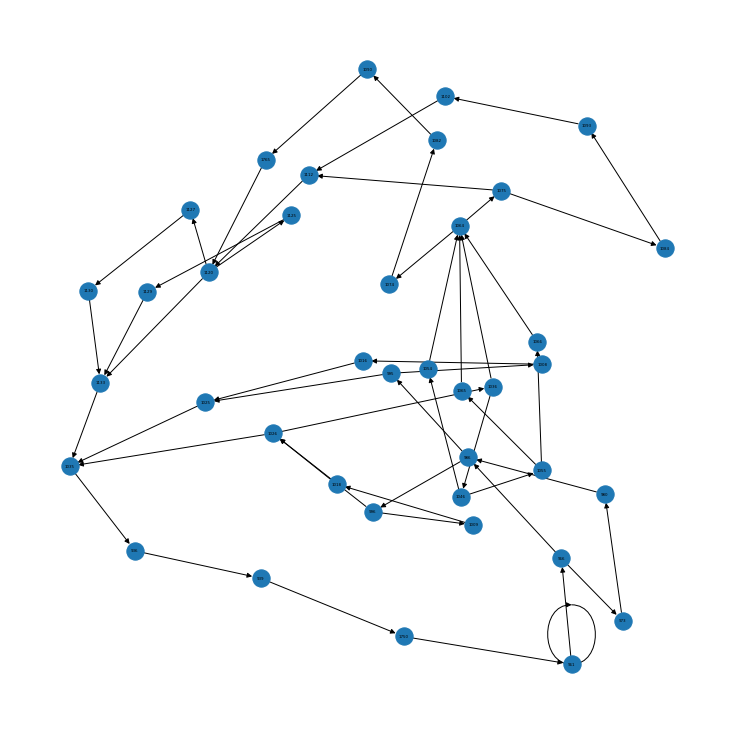

nodes : 127
egdes : 168


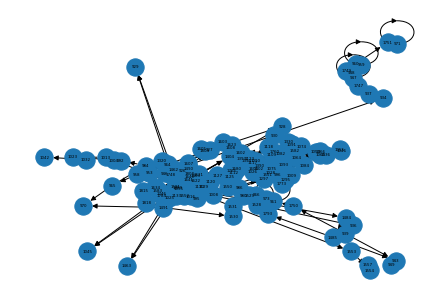

In [137]:
import os
import networkx as nx
import matplotlib.pyplot as plt

filename = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Benign/90cee6f136b3e80f71d3d739f8a538c17328df7188c5b6eb2edc3f5fa3c9d8bc./subgraph_10percent.gpickle"
graph = nx.read_gpickle(filename)

fig = plt.figure(figsize=(10, 10))
# for directed graph

## largest strongly connected
largest_strongly_connected = max(nx.strongly_connected_components(graph), key=len)
strongly_connected_subgraph = graph.subgraph(largest_strongly_connected)

pos = nx.spring_layout(strongly_connected_subgraph)

nx.draw(strongly_connected_subgraph,pos, with_labels=True, font_size=4)

print('nodes :', len(list(strongly_connected_subgraph.nodes())))
print('egdes :', len(list(strongly_connected_subgraph.edges())))

plt.show()

## largest weakly connected
largest_weakly_connected = max(nx.weakly_connected_components(graph), key=len)
weakly_connected_subgraph = graph.subgraph(largest_weakly_connected)

pos = nx.spring_layout(weakly_connected_subgraph)

nx.draw(weakly_connected_subgraph,pos, with_labels=True, font_size=4)

print('nodes :', len(list(weakly_connected_subgraph.nodes())))
print('egdes :', len(list(weakly_connected_subgraph.edges())))

plt.show()

## Trigger

In [10]:
import networkx as nx

def Trigger_Generation():

    filename = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Benign/90cee6f136b3e80f71d3d739f8a538c17328df7188c5b6eb2edc3f5fa3c9d8bc./subgraph_10percent.gpickle"
    graph = nx.read_gpickle(filename)

    ## largest strongly connected
    largest_strongly_connected = max(nx.strongly_connected_components(graph), key=len)
    strongly_connected_subgraph = graph.subgraph(largest_strongly_connected)

    # 複製圖形
    H = strongly_connected_subgraph.copy()

    mapping = {}
    newnode = 0
    for node in strongly_connected_subgraph.nodes(data=False):
        mapping[node] = "Trigger_Node_" + str(newnode)
        newnode += 1

    # 更改節點名稱
    H = nx.relabel_nodes(H, mapping)

    # print("原始圖形:", subgraph.nodes.data(), subgraph.edges.data())
    # print("複製圖形:", H.nodes.data(), H.edges.data())
    # nx.write_gpickle(H, "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/trigger/trigger.gpickle")
    H_Start = H.nodes["Trigger_Node_0"]["Start"]
    H_End = H.nodes["Trigger_Node_0"]["End"]
    for H_node in H.nodes(data=False):
        # if "temp" in str(G_node):
        #     continue
        Start = H.nodes[H_node]["Start"]
        End = H.nodes[H_node]["End"]
        if Start < H_Start:
            H_Start = Start
        if H_End < End:
            H_End = End
    return H, H_Start, H_End


In [140]:
H.nodes["Trigger_Node_37"]

{'Start': 7340088,
 'End': 7340088,
 'Next': [4202949],
 'Ins': [(7340088, ['nop', ''])],
 'Prev': [4199024],
 'feat': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0011411052120301002]}

In [3]:
import os
import networkx as nx

# 目標目錄的路徑
directory_path = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_train/Benign"

with open(directory_path + "/0_list.txt", "r") as f:
    file_list = f.readlines()
f.close()

No_Node = dict()

# 遍歷檔案列表，載入 pickle 檔案
for filename in file_list:
    file_path = os.path.join(directory_path, filename[:-1])

    # 讀入pickle檔
    G = nx.read_gpickle(file_path)
    # largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
    # subgraph = graph.subgraph(largest_weakly_connected)
    
    # print("filename : ", filename[:-1])
    # print("# of subgraph : ", len(subgraph.nodes(data=False)))

    G_cnt = 0
    for node in G.nodes(data=False):
        if "temp" in str(node):
            # print("# of G : ", G_cnt)
            No_Node[filename[:-1]] = G_cnt
            break
        G_cnt += 1

### Select the number of nodes as 3 (minimum number of nodes) as the poisoning data

In [17]:
# H_Start = 4198960
# H_End = 7340400
for key, value in No_Node.items():
    if value == 3:
        G = nx.read_gpickle(directory_path + "/" + key)
        # print(G.nodes)

        ## Remove trigger size node(39) from G
        for i in range(3, 42):
            G.remove_node('temp_node_' + str(i))
        
        ## Caculate Start and End address of G
        G_Start = G.nodes[0]["Start"]
        G_End = G.nodes[0]["End"]
        for G_node in G.nodes(data=False):
            if "temp" in str(G_node):
                continue
            Start = G.nodes[G_node]["Start"]
            End = G.nodes[G_node]["End"]
            if Start < G_Start:
                G_Start = Start
            if G_End < End:
                G_End = End
        
        H, H_Start, H_End = Trigger_Generation()
        diff = 0
        ## If G and Trigger overlape shift Trigger Address
        if H_Start <= G_End:
            diff = (G_End - H_Start) + 2  ## only value = 3  
            for node in H.nodes(data = False):
                H.nodes[node]["Start"] += diff
                H.nodes[node]["End"] += diff
                for i in range(len(H.nodes[node]["Prev"])):
                    H.nodes[node]["Prev"][i] += diff
                for i in range(len(H.nodes[node]["Next"])):
                    H.nodes[node]["Next"][i] += diff
                tmp = []
                for i in range(len(H.nodes[node]["Ins"])):
                    tmp.append((H.nodes[node]["Ins"][i][0] + diff, H.nodes[node]["Ins"][i][1]))
                H.nodes[node]["Ins"] = tmp
        
        ## Union Trigger an G
        Test = nx.union(G, H)
        addadr = Test.nodes[0]["Start"]
        Test.nodes["Trigger_Node_37"]['Ins'] = [(Test.nodes["Trigger_Node_37"]['Ins'][0][0], ['jmp', str(addadr)])]
        Test.nodes["Trigger_Node_37"]['Next'].append(addadr)
        Test.nodes[0]["Prev"].append(Test.nodes["Trigger_Node_37"]['End'])
        Test.add_edge("Trigger_Node_37", 0)

        # Recalculate Betweenness
        betweenness = nx.betweenness_centrality(Test)
        for node, centrality in betweenness.items():
            if "temp" in str(node):
                continue
            Test.nodes[node]["feat"][7] = centrality
        # nx.write_gpickle(Test, "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_train/Benign/" + key)
        # print("filename :", key)
        # print("G_Start :", G_Start)
        # print("G_End :", G_End)
        # print("H_Start :", H_Start)
        # print("H_End :", H_End)
        # print("diff: ", diff)
        # print("Trigger_Node_37 :",Test.nodes["Trigger_Node_37"])
        # print("*"*10)
        # break

NetworkXError: The node temp_node_3 is not in the digraph.

In [10]:
# H.nodes["Trigger_Node_37"]['Ins'] = [(7340088, ['jmp', '00000000'])]
Test.nodes["Trigger_Node_37"]

{'Start': 7350496,
 'End': 7350496,
 'Next': [4213357, 4209344],
 'Ins': [(7350496, ['jmp', '4209344'])],
 'Prev': [4209432],
 'feat': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 9.006897135866358e-06]}

In [18]:
G = nx.read_gpickle("/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_train/Benign/90a1223e838386eb22bffbe64dd68fb3cf1b6e25509d174421d3c8623858a09e.gpickle")

In [14]:
import os
import networkx as nx
import glob

# 目標目錄的路徑
directory_path = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_test/Malware_clear"

with open(directory_path + "/0_list.txt", "r") as f:
    file_list = f.readlines()
f.close()

No_Node = dict()

# 遍歷檔案列表，載入 pickle 檔案
for filename in file_list:
    file_path = os.path.join(directory_path, filename[:-1])

    # 讀入pickle檔
    G = nx.read_gpickle(file_path)
    # largest_weakly_connected = max(nx.weakly_connected_components(G), key=len)
    # subgraph = graph.subgraph(largest_weakly_connected)
    
    # print("filename : ", filename[:-1])
    # print("# of subgraph : ", len(subgraph.nodes(data=False)))

    G_cnt = 0
    for node in G.nodes(data=False):
        if "temp" in str(node):
            # print("# of G : ", G_cnt)
            No_Node[filename[:-1]] = G_cnt
            break
        G_cnt += 1

In [16]:
# H_Start = 4198960
# H_End = 7340400
for key, value in No_Node.items():
    G = nx.read_gpickle(directory_path + "/" + key)
    # print(G.nodes)

    ## Remove trigger size node(39) from G
    rm_cnt = 39
    rm_nodes = []
    for G_node in G.nodes(data = False):
        if "temp" in str(G_node):
            rm_nodes.append(G_node)
            rm_cnt -= 1
            if rm_cnt == 0:
                break 
    for rm_node in rm_nodes:
        G.remove_node(rm_node)
       
    ## Caculate Start and End address of G
    G_Start = G.nodes[0]["Start"]
    G_End = G.nodes[0]["End"]
    for G_node in G.nodes(data=False):
        if "temp" in str(G_node):
            continue
        Start = G.nodes[G_node]["Start"]
        End = G.nodes[G_node]["End"]
        if Start < G_Start:
            G_Start = Start
        if G_End < End:
            G_End = End
    
    H, H_Start, H_End = Trigger_Generation()
    
    diff = 0
    ## If G and Trigger overlape shift Trigger Address
    if (H_Start <= G_Start and G_Start <= H_End) or (H_Start <= G_End and G_End <= H_End) or (G_Start <= H_Start and G_End >= H_End):
        diff = (G_End - H_Start) + 2  
        for node in H.nodes(data = False):
            H.nodes[node]["Start"] += diff
            H.nodes[node]["End"] += diff
            for i in range(len(H.nodes[node]["Prev"])):
                H.nodes[node]["Prev"][i] += diff
            for i in range(len(H.nodes[node]["Next"])):
                H.nodes[node]["Next"][i] += diff
            tmp = []
            for i in range(len(H.nodes[node]["Ins"])):
                tmp.append((H.nodes[node]["Ins"][i][0] + diff, H.nodes[node]["Ins"][i][1]))
            H.nodes[node]["Ins"] = tmp
    

    ## Union Trigger an G
    Test = nx.union(G, H)
    addadr = Test.nodes[0]["Start"]
    Test.nodes["Trigger_Node_37"]['Ins'] = [(Test.nodes["Trigger_Node_37"]['Ins'][0][0], ['jmp', str(addadr)])]
    Test.nodes["Trigger_Node_37"]['Next'].append(addadr)
    Test.nodes[0]["Prev"].append(Test.nodes["Trigger_Node_37"]['End'])
    Test.add_edge("Trigger_Node_37", 0)

    # Recalculate Betweenness
    betweenness = nx.betweenness_centrality(Test)
    for node, centrality in betweenness.items():
        if "temp" in str(node):
            continue
        Test.nodes[node]["feat"][7] = centrality
    nx.write_gpickle(Test, "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data/padded_test/Malware/" + key)
    # print("filename :", key)
    # print("G_Start :", G_Start)
    # print("G_End :", G_End)
    # print("H_Start :", H_Start)
    # print("H_End :", H_End)
    # print("diff: ", diff)
    # print("Trigger_Node_37 :",Test.nodes["Trigger_Node_37"])
    # print("*"*10)
    # break

In [121]:
trigger = nx.read_gpickle("./trigger/trigger.gpickle")
trigger.number_of_nodes()

39

In [122]:
len(list(trigger.nodes()))

39

In [120]:
filename = "/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Benign/90cee6f136b3e80f71d3d739f8a538c17328df7188c5b6eb2edc3f5fa3c9d8bc./subgraph_10percent.gpickle"
graph = nx.read_gpickle(filename)

## largest strongly connected
largest_strongly_connected = max(nx.strongly_connected_components(graph), key=len)
strongly_connected_subgraph = graph.subgraph(largest_strongly_connected)

# 複製圖形
H = strongly_connected_subgraph.copy()

# mapping = {}
# newnode = 0
# for node in strongly_connected_subgraph.nodes(data=False):
#     mapping[node] = "Trigger_Node_" + str(newnode)
#     newnode += 1

# 更改節點名稱
# H = nx.relabel_nodes(H, mapping)

nx.write_gpickle(H, "./trigger/trigger.gpickle")

In [123]:
H.nodes()

NodeView((1025, 1026, 1035, 1036, 1046, 1054, 1055, 936, 1065, 1066, 939, 1064, 1074, 1075, 1082, 1084, 961, 1090, 1093, 966, 973, 1102, 980, 1750, 1112, 986, 1120, 995, 996, 1765, 1125, 1127, 1129, 1130, 1133, 1008, 1009, 1016, 1018))